## Classification with MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
%matplotlib inline

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
mnist['data'], mnist['target']

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

Lets, just check if the data and target are matching

(-0.5, 27.5, 27.5, -0.5)

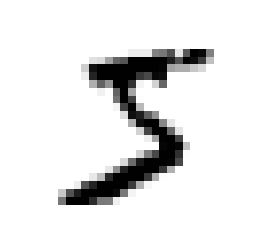

In [23]:
plt.imshow(mnist['data'][0].reshape(28,28), 
          cmap='binary')
plt.axis('off')          

In [24]:
mnist.target[0]

5

It looks good.

In [25]:
mnist.target.shape

(70000,)

In [26]:
X_train, X_test = mnist['data'][:60000], mnist['data'][60000:]
y_train, y_test = mnist['target'][:60000], mnist['target'][60000:]

X_train.shape

(60000, 784)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_c = KNeighborsClassifier()
knn_c.fit(X_train, y_train)

array([5], dtype=int8)

In [31]:
knn_c.predict(X_train[0:10])

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [32]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [ ]:
y_predict = knn_c.predict(X_train)
sum(y_predict == y_train)/len(y_train)